In [ ]:
# Import libraries
import numpy as np
import pandas as pd
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#Create an instance of RandomForestClassifier
rf=RandomForestClassifier(random_state=1904703, n_estimators=100)
gb= GradientBoostingClassifier(random_state=1904703, n_estimators=100)
dt= DecisionTreeClassifier(random_state=1904703)
et= ExtraTreeClassifier(random_state=1904703)
lr= LogisticRegression(random_state=1904703)
svc= SVC( random_state=1904703)
mlp= MLPClassifier(random_state=1904703)

In [ ]:
#read val-matches-cleaned.csv
val_matches = pd.read_csv('./Data files/val-matches.csv')

In [ ]:
val_matches['Winner'] = np.where(val_matches['Team 1 Score'] > val_matches['Team 2 Score'], 1, 0)
# Sort rows by match id
val_matches = val_matches.sort_values(by=['Series Id'], ascending=True)
val_matches = val_matches.drop([
    'Match Id',
    'Series Id',
    'Event Name',
    'Win Condition',
    'Date',
    'Total Count',
    'Team 1 Id',
    'Team 2 Id',
    #'Team 1 Player Ids',
    #'Team 2 Player Ids',
    #'Team 1 Agents',
    #'Team 2 Agents',
    'Team 1 Score',
    'Team 2 Score',
    #'Team 1 Score At Half',
    #'Team 2 Score At Half', 
    "Team 1 Pistol Wins",
    "Team 1 Attacking Pistol Wins",
    "Team 1 Defending Pistol Wins",
    "Team 1 Attacking Wins",
    "Team 1 Attacking Losses",
    "Team 1 Defending Wins",
    "Team 1 Defending Losses",
    "Team 2 Pistol Wins",
    "Team 2 Attacking Pistol Wins",
    "Team 2 Defending Pistol Wins",
    "Team 2 Attacking Wins",
    "Team 2 Attacking Losses",
    "Team 2 Defending Wins",
    "Team 2 Defending Losses"
    ], axis=1)
val_matches.head()

,Map Name,Team 1 Name,Team 2 Name,Attacking First Team Number,Team 1 Player Ids,Team 2 Player Ids,Team 1 Agents,Team 2 Agents,Winner
1543,Breeze,Team Liquid,Gambit Esports,2,"[1403,17788,1690,2056,10211]","[1964,1081,3135,2528,274]","Sova,Viper,Skye,KAY/O,Chamber","Sova,Viper,Jett,Skye,Chamber",0
1544,Icebox,Team Liquid,Gambit Esports,2,"[2056,17788,1403,1690,10211]","[1964,274,1081,3135,2528]","Sova,Viper,Sage,Reyna,Chamber","Sova,Viper,Sage,Jett,KAY/O",0
1540,Split,G2 Esports (Inactive),FNATIC,1,"[1826,2377,2594,2769,2940]","[2937,154,2290,76,2011]","Raze,Cypher,Sage,Omen,Jett","Raze,Viper,Sage,Astra,KAY/O",0
1542,Icebox,G2 Esports (Inactive),FNATIC,2,"[1826,2377,2769,2594,2940]","[2290,154,76,2011,2937]","Sova,Killjoy,Viper,Sage,Jett","Sova,Killjoy,Viper,Sage,Jett",0
1541,Ascent,G2 Esports (Inactive),FNATIC,1,"[1826,2377,2940,2769,2594]","[2290,154,2937,76,2011]","Sova,Killjoy,Jett,Astra,KAY/O","Sova,Killjoy,Jett,Astra,KAY/O",1


In [ ]:
def player_id_list(results, team_number):
    list_of_player_ids = []

    for index, row in results.iterrows():
        player_ids = row['Team ' + team_number + ' Player Ids']
        player_ids = player_ids[1:-1]
        player_ids = player_ids.split(',')
        player_ids = [int(i) for i in player_ids]
        list_of_player_ids.append(player_ids)
    return list_of_player_ids

def agents_to_list(results, team_number):
    list_of_agent_lists = []
    for index, row in results.iterrows():
        agents = row['Team ' + team_number + ' Agents'].split(',')
        for x in range(len(agents)):
            agents[x] = agents[x] + '_' + team_number
        list_of_agent_lists.append(agents)
    return list_of_agent_lists

In [ ]:
val_matches['Team 1 Player Ids'] = player_id_list(val_matches, '1')
val_matches['Team 2 Player Ids'] = player_id_list(val_matches, '2')
val_matches['Team 1 Agents'] = agents_to_list(val_matches, '1')
val_matches['Team 2 Agents'] = agents_to_list(val_matches, '2')

In [ ]:
df = pd.read_csv('./Data files/merged.csv')

In [ ]:
# Create an elo system for each player
# Create a dictionary of players and their elo
elo_dict = {}
for index, row in df.iterrows():
    if row['Player Id'] not in elo_dict:
        elo_dict[row['Player Id']] = 1000

# Players with higher kd should have higher elo
# Players with higher acs should have higher elo

# Create a dictionary of players and their acs
acs_dict = {}
for index, row in df.iterrows():
    if row['Player Id'] not in acs_dict:
        acs_dict[row['Player Id']] = row['Acs']

# Create a dictionary of players and their kd
kd_dict = {}
for index, row in df.iterrows():
    if row['Player Id'] not in kd_dict:
        kd_dict[row['Player Id']] = row['Kd']
print(val_matches['Team 1 Player Ids'])


1543    [1403, 17788, 1690, 2056, 10211]
1544    [2056, 17788, 1403, 1690, 10211]
1540      [1826, 2377, 2594, 2769, 2940]
1542      [1826, 2377, 2769, 2594, 2940]
1541      [1826, 2377, 2940, 2769, 2594]
                      ...               
8          [3211, 2841, 398, 2483, 2716]
7          [2483, 2841, 3211, 398, 2716]
6          [2841, 398, 2483, 2716, 3211]
5          [2483, 2841, 398, 2716, 3211]
4          [2841, 3211, 398, 2716, 2483]
Name: Team 1 Player Ids, Length: 1588, dtype: object


In [ ]:
# Modify elo based on win rate kd and acs
error_ids = []
for index, row in val_matches.iterrows():
    if row['Winner'] == 1:
        for player in row['Team 1 Player Ids']:
            try:
                elo_dict[player] += 100 * kd_dict[player]
                elo_dict[player] += 100 * acs_dict[player]
            except KeyError:
                if player not in error_ids:
                    error_ids.append(player)

        for player in row['Team 2 Player Ids']:
            try:
                elo_dict[player] -= 100 * kd_dict[player]
                elo_dict[player] -= 100 * acs_dict[player]
            except KeyError:
                if player not in error_ids:
                    error_ids.append(player)
    else:
        for player in row['Team 2 Player Ids']:
            try:
                elo_dict[player] += 100 * kd_dict[player]
                elo_dict[player] += 100 * acs_dict[player]
            except KeyError:
                if player not in error_ids:
                    error_ids.append(player)
        for player in row['Team 1 Player Ids']:
            try:
                elo_dict[player] -= 100 * kd_dict[player]
                elo_dict[player] -= 100 * acs_dict[player]
            except KeyError:
                if player not in error_ids:
                    error_ids.append(player)

print(error_ids)

# Add total elo of each team to the val matches dataframe
team1_elo_list = []
team2_elo_list = []
for index, row in val_matches.iterrows():
    team1_elo = 0
    team2_elo = 0
    for player in row['Team 1 Player Ids']:
        team1_elo += elo_dict[player]
    for player in row['Team 2 Player Ids']:
        team2_elo += elo_dict[player]
    team1_elo_list.append(team1_elo)
    team2_elo_list.append(team2_elo)

val_matches['Team 1 Total Player Elo'] = team1_elo_list
val_matches['Team 2 Total Player Elo'] = team2_elo_list

val_matches.drop(['Team 1 Player Ids', 'Team 2 Player Ids'], axis=1, inplace=True)

[]


In [ ]:
cat_encoder = OneHotEncoder()# instantiate a class
# code the feature called default which takes yes, no value
results_encoded = pd.get_dummies(val_matches, columns=[
    'Map Name',
])

In [ ]:
mlb = MultiLabelBinarizer()
results_encoded = results_encoded.join(pd.DataFrame(mlb.fit_transform(results_encoded.pop('Team 1 Agents')),
                          columns=mlb.classes_,
                          index=val_matches.index))
results_encoded = results_encoded.join(pd.DataFrame(mlb.fit_transform(results_encoded.pop('Team 2 Agents')),
                          columns=mlb.classes_,
                          index=val_matches.index))

In [ ]:
team_attack_speed = pd.read_csv('./Data files/team-attack-speed.csv')
team_comp = pd.read_csv('./Data files/team-comp.csv')
team_map_performance = pd.read_csv('./Data files/team-map-performance.csv')
team_post_plants = pd.read_csv('./Data files/team-post-plants.csv')
team_round_performance = pd.read_csv('./Data files/team-round-performance.csv')
team_win_conditions = pd.read_csv('./Data files/team-win-conditions.csv')
team_xvy_performance = pd.read_csv('./Data files/team-xvy-performance.csv')

#df_team = pd.merge(team_map_performance, team_comp, on='Team')
df_team = pd.merge(team_round_performance, team_post_plants, on='Team')
#df_team = pd.merge(df_team, team_round_performance, on='Team')
#df_team = pd.merge(df_team, team_win_conditions, on='Team')
#df_team = pd.merge(df_team, team_xvy_performance, on='Team')

In [ ]:
# Create a dictionary of teams and their elo
team_elo_dict = {}
for index, row in df_team.iterrows():
    if row['Team'] not in team_elo_dict:
        team_elo_dict[row['Team']] = 1000
    
# Modify elo based on win rate kd and acs
for index, row in results_encoded.iterrows():
    if row['Winner'] == 1:
        team_elo_dict[row['Team 1 Name']] += 100
        team_elo_dict[row['Team 2 Name']] -= 100
    else:
        team_elo_dict[row['Team 1 Name']] -= 100
        team_elo_dict[row['Team 2 Name']] += 100 

In [ ]:
for index, row in results_encoded.iterrows():
    #replace team names with elo
    # if value is a string, replace it with the elo
    if isinstance(row['Team 1 Name'], str):
        results_encoded.at[index, 'Team 1 Name'] = team_elo_dict[row['Team 1 Name']]
        results_encoded.at[index, 'Team 2 Name'] = team_elo_dict[row['Team 2 Name']]

In [ ]:
Y = results_encoded['Winner']
X = results_encoded.drop("Winner", axis=1)
X.head(3)

,Team 1 Name,Team 2 Name,Attacking First Team Number,Team 1 Total Player Elo,Team 2 Total Player Elo,Map Name_Ascent,Map Name_Bind,Map Name_Breeze,Map Name_Fracture,Map Name_Haven,...,Neon_2,Omen_2,Phoenix_2,Raze_2,Reyna_2,Sage_2,Skye_2,Sova_2,Viper_2,Yoru_2
1543,1900,1100,2,802703.0,654405.0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
1544,1900,1100,2,802703.0,654405.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1540,1500,2500,1,524095.0,1117336.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
normalized_X= preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1904703, shuffle=False)

#Fit model with training data
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dt.fit(X_train, y_train)
et.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
mlp.fit(X_train, y_train)


# Prediction
rf_predictions = rf.predict(X_test)
gb_predictions = gb.predict(X_test)
dt_predictions = dt.predict(X_test)
et_predictions = et.predict(X_test)
lr_predictions = lr.predict(X_test)
svc_predictions = svc.predict(X_test)
mlp_predictions = mlp.predict(X_test)
#Results
accuracy_rf = accuracy_score(y_test, rf_predictions)
accuracy_gb = accuracy_score(y_test, gb_predictions)
accuracy_dt = accuracy_score(y_test, dt_predictions)
accuracy_et = accuracy_score(y_test, et_predictions)
accuracy_lr = accuracy_score(y_test, lr_predictions)
accuracy_svc = accuracy_score(y_test, svc_predictions)
accuracy_mlp = accuracy_score(y_test, mlp_predictions)
print(f'The overall accuracy of RF is {np.round(accuracy_rf*100,2)}%')
print(f'The overall accuracy of GB is {np.round(accuracy_gb*100,2)}%')
print(f'The overall accuracy of DT is {np.round(accuracy_dt*100,2)}%')
print(f'The overall accuracy of ET is {np.round(accuracy_et*100,2)}%')
print(f'The overall accuracy of LR is {np.round(accuracy_lr*100,2)}%')
print(f'The overall accuracy of SVC is {np.round(accuracy_svc*100,2)}%')
print(f'The overall accuracy of MLP is {np.round(accuracy_mlp*100,2)}%')

The overall accuracy of RF is 61.95%
The overall accuracy of GB is 63.84%
The overall accuracy of DT is 57.55%
The overall accuracy of ET is 55.35%
The overall accuracy of LR is 67.3%
The overall accuracy of SVC is 69.18%
The overall accuracy of MLP is 60.69%


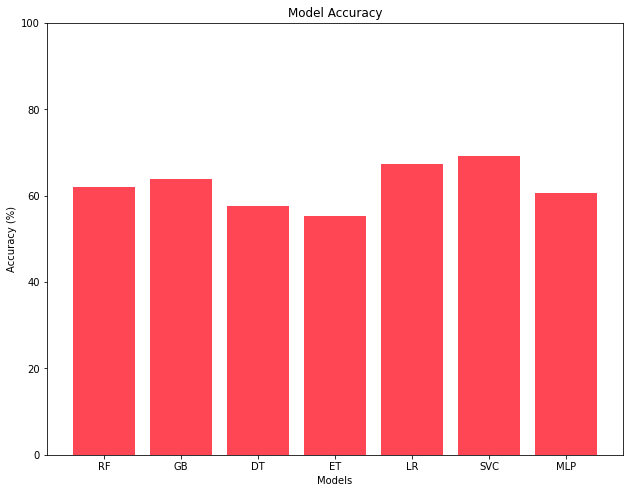

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
models = ['RF', 'GB', 'DT', 'ET', 'LR', 'SVC', 'MLP']
accuracies = [np.round(accuracy_rf*100,2), np.round(accuracy_gb*100,2), np.round(accuracy_dt*100,2), np.round(accuracy_et*100,2), np.round(accuracy_lr*100,2), np.round(accuracy_svc*100,2), np.round(accuracy_mlp*100,2)]
ax.bar(models,accuracies, color='#FF4654')
# Set y-axis to be 0-100
ax.set_ylim(0,100)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy')
ax.set_xlabel('Models')
plt.rcParams.update({'font.size': 18})
plt.show()

In [ ]:
def get_feature_importance(model, feature_names):
    feature_importance = {
        pd.DataFrame(
        {
            'variable': feature_names,
            'coefficient': model.coef_[0]
        }
        )
        .round(decimals=2) \
        .sort_values('coefficient', ascending=False) \
        .style.bar(color=['#d65f5f', '#5fba7d'])
    }
    return feature_importance

In [ ]:
X_train.columns

Index(['Team 1 Name', 'Team 2 Name', 'Attacking First Team Number',
       'Team 1 Total Player Elo', 'Team 2 Total Player Elo', 'Map Name_Ascent',
       'Map Name_Bind', 'Map Name_Breeze', 'Map Name_Fracture',
       'Map Name_Haven', 'Map Name_Icebox', 'Map Name_Pearl', 'Map Name_Split',
       'Astra_1', 'Breach_1', 'Brimstone_1', 'Chamber_1', 'Cypher_1', 'Fade_1',
       'Jett_1', 'KAY/O_1', 'Killjoy_1', 'Neon_1', 'Omen_1', 'Phoenix_1',
       'Raze_1', 'Reyna_1', 'Sage_1', 'Skye_1', 'Sova_1', 'Viper_1', 'Yoru_1',
       'Astra_2', 'Breach_2', 'Brimstone_2', 'Chamber_2', 'Cypher_2', 'Fade_2',
       'Jett_2', 'KAY/O_2', 'Killjoy_2', 'Neon_2', 'Omen_2', 'Phoenix_2',
       'Raze_2', 'Reyna_2', 'Sage_2', 'Skye_2', 'Sova_2', 'Viper_2', 'Yoru_2'],
      dtype='object')

In [ ]:
lr.coef_[0]

array([ 5.32906786e-05,  5.51609125e-05,  1.17356565e-07,  5.54232592e-07,
       -7.40949606e-07,  2.97635960e-08,  3.58626686e-08, -2.79887818e-08,
        1.74702215e-08,  1.56055706e-08, -8.60486878e-09,  0.00000000e+00,
       -3.30311998e-09,  3.51161115e-08,  8.41353807e-09,  1.77843479e-08,
        9.65193646e-09,  9.10699266e-10,  7.93764880e-09,  2.91264176e-08,
        8.94589500e-09,  5.09768989e-08,  5.37130988e-09,  3.05492437e-08,
        4.42733983e-10,  4.58476739e-08,  2.95220450e-09,  1.70399234e-08,
        1.91581088e-08,  1.59910494e-09,  3.98408635e-10,  1.80422543e-09,
        4.47407064e-08,  3.25708683e-08,  1.12825203e-08, -3.00047591e-09,
        1.19688203e-08,  1.58938149e-08,  1.62244556e-08,  4.85473502e-09,
        3.72056583e-08, -6.28054629e-09,  3.48869161e-08,  1.54172313e-09,
        4.65866708e-08,  8.13984583e-09, -1.06007178e-08,  4.23148013e-08,
        4.70735259e-09, -4.95431432e-09,  7.50559902e-09])

In [ ]:
get_feature_importance(lr, X_train.columns)


{<pandas.io.formats.style.Styler at 0x146ddbb6ac0>}

Text(0.5, 0, 'Feature Importance')

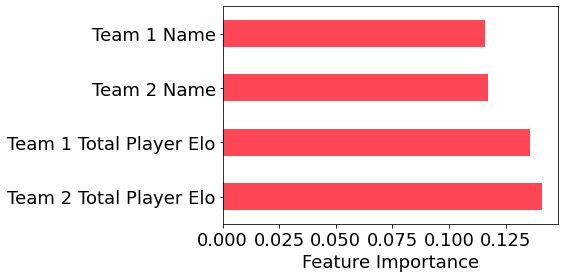

In [ ]:
(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh', color='#FF4654').set_xlabel('Feature Importance'))  



Text(0.5, 0, 'Feature Importance')

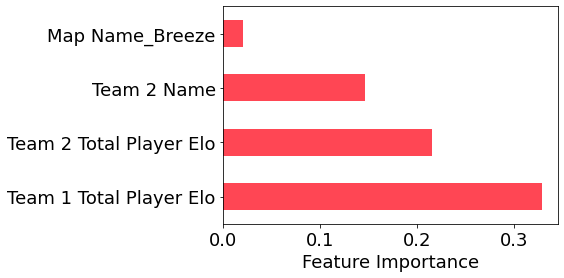

In [ ]:
(pd.Series(gb.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh', color='#FF4654').set_xlabel('Feature Importance'))